In [93]:
import numpy as np
import matplotlib.pyplot as plt

from utils import restrict, interpolate, smooth

In [ ]:
# Load function
def f(t):
    return np.ones_like(t)

def P(i):
    """Generate the problem for 1-dimensional discrete Poisson equaton

    Parameters
    ----------
    i : int
        Number of unknowns will be 2**i - 1

    Returns
    -------
    numpy.array
        System matrix  
    numpy.array
        right-hand side
    numpy.array
        grid
    """
    number_of_points = 2**i + 1
    t = np.linspace(0, 1, number_of_points)
    T = utils.system_matrix_1d(i)
    b = f(t[1:-1])
    return T, b, t

def solve(i):
    T, b, _ = P(i)
    x = np.linalg.solve(T, b)
    return x, b

In [102]:
# The problem wrapped into a class
class FEMPoissonProblem:
    def __init__(self, i):
        self.i = i
        number_of_points = 2**i + 1
        t = np.linspace(0, 1, number_of_points)
        T = utils.system_matrix_1d(i)
        b = f(t[1:-1])
        self.T = T
        self.b = b
        self.grid = t
        
    def solve(self):
        x = np.linalg.solve(self.T, self.b)
        return x, self.b

In [94]:
# Multigrid V-cycle
def MGV(b_i, x_i, i):
    """Recursive Multigrid V-cycle algorithm

    Parameters
    ----------
    b_i : numpy.array
        right-hand side of problem P(i)
        
    x_i : numpy.array
        solution of problem P(i)

    Returns
    -------
    numpy.array
        right-hand side of P(i)  
    numpy.array
        solution to the problem P(i)
    """
    if i == 1:
        T, b, _ = P(1)
        x = b/T
        return b, x
    else:
        T_i, _, _ = P(i)
        x_i = smooth(x=x_i, A=T_i, b=b_i)
        b_i_1, x_i_1 = restrict(b_i, x_i)
        b_mgv, x_mgv = MGV(b_i_1, x_i_1, i-1)
        b_i, d_i = interpolate(b_mgv, x_mgv)
        x_i = x_i - d_i
        x_i = smooth(x=x_i, A=T_i, b=b_i)
        return b_i, x_i
    

# Full Multigrid
def FMG(b_m, x_m, m):
    x_i_1, b_i_1  = solve(1)
    xs = []
    bs = []
    xs.append(x_i_1)
    bs.append(b_i_1)
    for i in range(2, m):
        b_In, x_In = interpolate(b_i_1, x_i_1)
        x_i, b_i = MGV(b_In, x_In, i)
        xs.append(x_i)
        bs.append(b_i)

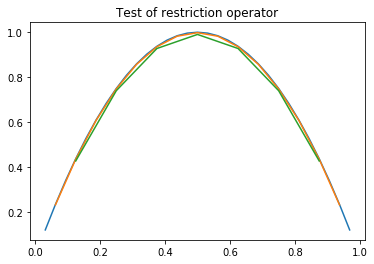

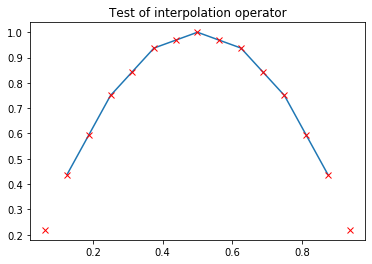

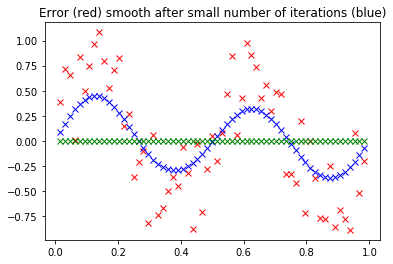

In [4]:
%run -i "test.py"§